<a href="https://colab.research.google.com/github/Karl53345334/Test1/blob/main/%E3%80%8CGreedy_Best_First_Search__01_ipynb%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq

In [ ]:
# Node class to represent a state in the search
class Node:
    def __init__(self, city, heuristic, parent=None):
        self.city = city  # Current city
        self.heuristic = heuristic  # Heuristic value (straight-line distance to Bucharest)
        self.parent = parent  # Parent node

    def __lt__(self, other):
        return self.heuristic < other.heuristic  # Compare heuristic values

In [ ]:
# Heuristics: straight-line distances to Bucharest
heuristics = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Dobreta': 242, 'Eforie': 161,
    'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151, 'Iasi': 226, 'Lugoj': 244,
    'Mehadia': 241, 'Neamt': 234, 'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193,
    'Sibiu': 253, 'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
}

In [ ]:
# Graph: neighboring cities and distances
graph = {
    'Arad': [('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Dobreta', 75)],
    'Dobreta': [('Mehadia', 75), ('Craiova', 120)],
    'Craiova': [('Dobreta', 120), ('Pitesti', 138), ('Rimnicu Vilcea', 146)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Pitesti': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Bucharest': [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)],
    'Giurgiu': [('Bucharest', 90)],
    'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Eforie': [('Hirsova', 86)],
    'Vaslui': [('Urziceni', 142), ('Iasi', 92)],
    'Iasi': [('Vaslui', 92), ('Neamt', 87)],
    'Neamt': [('Iasi', 87)]
}

In [ ]:
# Function to reconstruct the path from the goal node to the start node
def reconstruct_path(node):
    path = []
    while node is not None:
        path.append(node.city)
        node = node.parent
    return path[::-1]  # Reverse the path to go from start to goal

In [ ]:
# Greedy Best-First Search algorithm
def greedy_best_first_search(start, goal):
    # Create a priority queue and add the start node
    open_list = []
    heapq.heappush(open_list, Node(start, heuristics[start]))

    # Set to keep track of visited nodes
    visited = set()

    while open_list:
        # Get the node with the lowest heuristic value (best node)
        current_node = heapq.heappop(open_list)

        # If the goal is reached, reconstruct and return the path
        if current_node.city == goal:
            return reconstruct_path(current_node)

        # Mark the node as visited
        visited.add(current_node.city)

In [ ]:
# Greedy Best-First Search algorithm
def greedy_best_first_search(start, goal):
    # Create a priority queue and add the start node
    open_list = []
    heapq.heappush(open_list, Node(start, heuristics[start]))

    # Set to keep track of visited nodes
    visited = set()

    while open_list:
        # Get the node with the lowest heuristic value (best node)
        current_node = heapq.heappop(open_list)

        # If the goal is reached, reconstruct and return the path
        if current_node.city == goal:
            return reconstruct_path(current_node)

        # Mark the node as visited
        visited.add(current_node.city)

        # Expand neighbors of the current node
        for neighbor, _ in graph[current_node.city]:
            if neighbor not in visited:
                # Create a new node for the neighbor
                neighbor_node = Node(neighbor, heuristics[neighbor], current_node)
                heapq.heappush(open_list, neighbor_node)

    return None  # If no solution is found
def greedy_best_first_search(start, goal):
    # 優先隊列初始化，加入起始節點
    open_list = []
    heapq.heappush(open_list, Node(start, heuristics[start]))

    visited = set()

    while open_list:
        # 取出啟發式值最小的節點
        current_node = heapq.heappop(open_list)
        current_city = current_node.city

        # 如果到達目標，則回溯路徑
        if current_city == goal:
            path = []
            while current_node:
                path.append(current_node.city)
                current_node = current_node.parent
            return path[::-1]  # 返回反向路徑

        visited.add(current_city)

        # 擴展當前節點的鄰居
        for neighbor, distance in graph[current_city]:
            if neighbor not in visited:
                heapq.heappush(open_list, Node(neighbor, heuristics[neighbor], current_node))

    return None  # 如果找不到路徑，返回 None

In [ ]:
# Example Usage: Finding the path from Arad to Bucharest
path = greedy_best_first_search('Arad', 'Bucharest')
print("Path from Arad to Bucharest:", path)

Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


In [ ]:
# Example Usage: Finding the path from Oradea to Bucharest
path = greedy_best_first_search('Oradea', 'Bucharest')
print("Path from Oradea to Bucharest:", path)

Path from Oradea to Bucharest: ['Oradea', 'Sibiu', 'Fagaras', 'Bucharest']


In [ ]:
# Example Usage: Finding the path from Mehadia to Bucharest
path = greedy_best_first_search('Mehadia', 'Bucharest')
print("Path from Mehadia to Bucharest:", path)

Path from Mehadia to Bucharest: ['Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest']


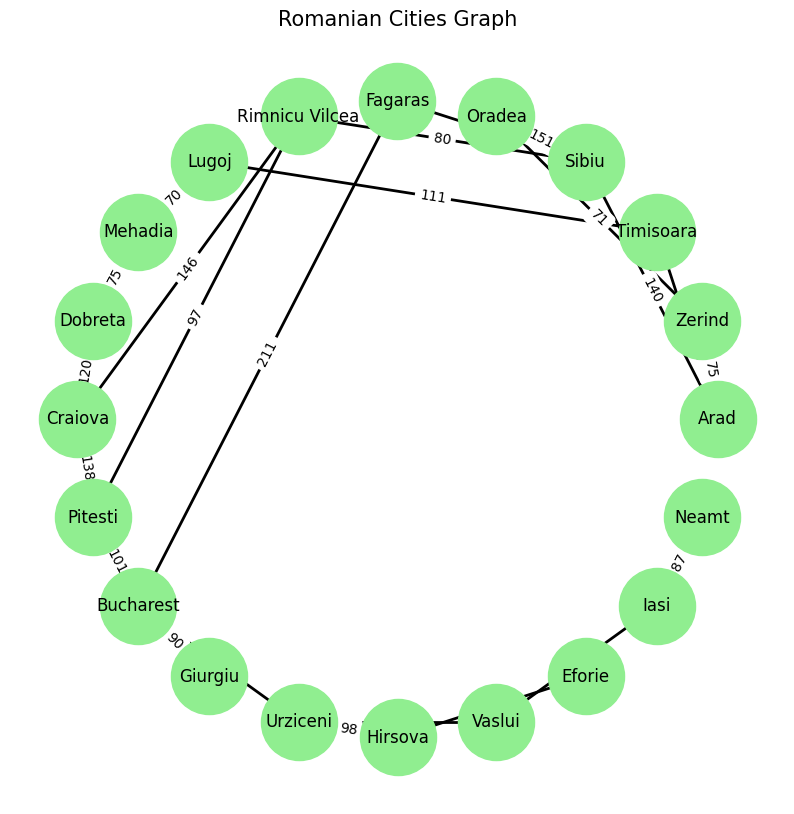

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 建立一個空的圖
G = nx.Graph()

# 添加節點及其連接邊（從 graph 字典中讀取）
for city, neighbors in graph.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

# 使用 circular_layout 來減少節點重疊
pos = nx.circular_layout(G)

# 繪製圖形
plt.figure(figsize=(10, 10))  # 設置圖形大小
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightgreen')  # 節點顏色和大小
nx.draw_networkx_edges(G, pos, width=2)  # 邊的寬度
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')  # 節點標籤

# 添加邊的權重（距離）
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 顯示圖形
plt.title("Romanian Cities Graph", fontsize=15)
plt.axis('off')  # 關閉軸
plt.show()

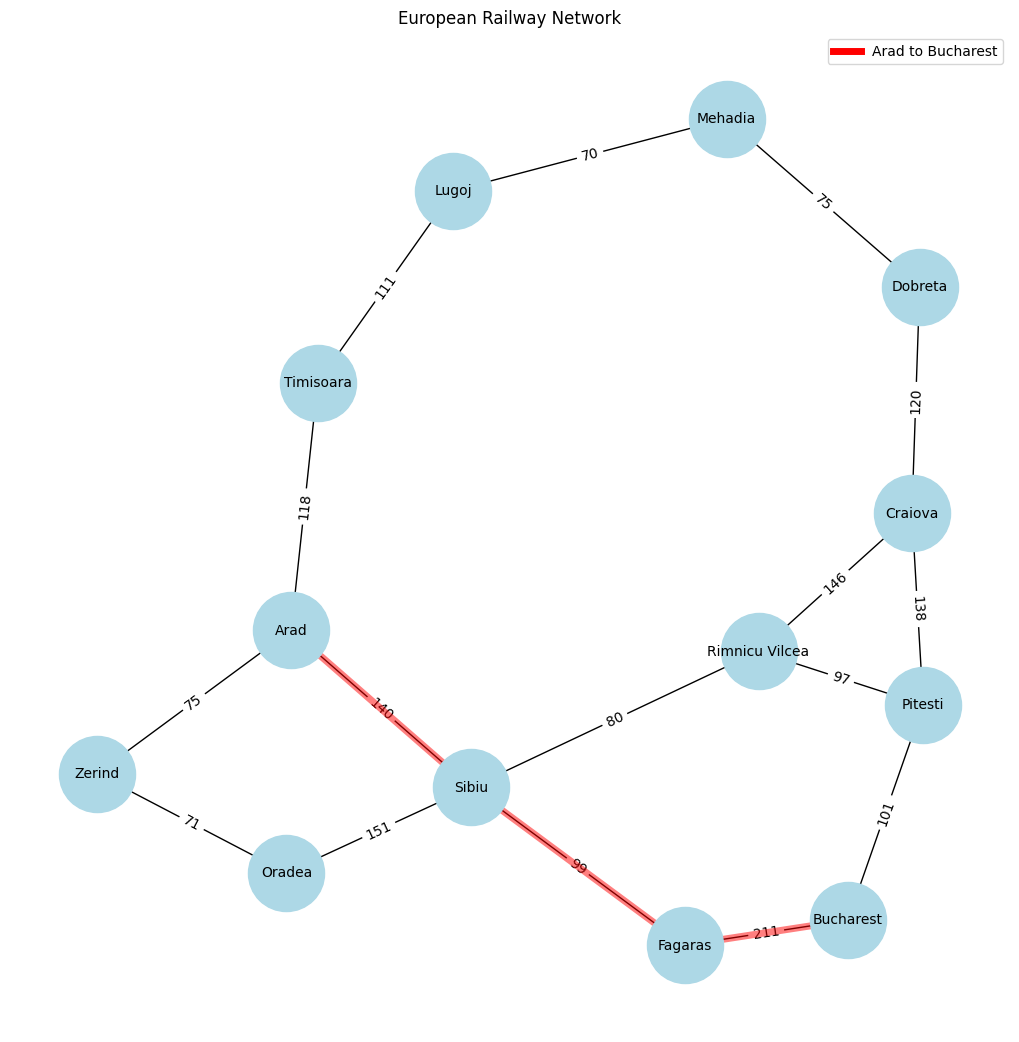

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define your graph data based on the stations and distances (example)
graph = {
    'Arad': [('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Dobreta', 75)],
    'Dobreta': [('Mehadia', 75), ('Craiova', 120)],
    'Craiova': [('Dobreta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
    'Pitesti': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Bucharest': [('Fagaras', 211), ('Pitesti', 101)],
}

# Create a graph object
G = nx.Graph()

# Add edges and weights from the graph dictionary
for city, neighbors in graph.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

# Define the layout for the graph, you can also try spring_layout or circular_layout
pos = nx.spring_layout(G)

# Draw the nodes and edges
plt.figure(figsize=(10, 10))  # Set figure size
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
# 找到從 Arad 到 Bucharest 的路徑
path = greedy_best_first_search('Arad', 'Bucharest')
if path:
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=5, edge_color=(1, 0, 0, 0.5))
# Display the plot
plt.title("European Railway Network")
# 顯示圖例
plt.legend(handles=[plt.Line2D([0], [0], color='red', lw=5)], labels=['Arad to Bucharest'])
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [ ]:
# 定義城市與距離的圖
graph = {
    'Arad': [('Zerind', 75), ('Timisoara', 118), ('Sibiu', 140)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Craiova', 146), ('Pitesti', 97)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Dobreta', 75)],
    'Dobreta': [('Mehadia', 75), ('Craiova', 120)],
    'Craiova': [('Dobreta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
    'Pitesti': [('Rimnicu Vilcea', 97), ('Craiova', 138), ('Bucharest', 101)],
    'Bucharest': [('Fagaras', 211), ('Pitesti', 101)],
}


In [ ]:
# 啟發函數（每個城市到 Bucharest 的直線距離）
heuristics = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Dobreta': 242, 'Fagaras': 176,
    'Lugoj': 244, 'Mehadia': 241, 'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193,
    'Sibiu': 253, 'Timisoara': 329, 'Zerind': 374
}

In [ ]:
# 定義 Greedy Best-First Search
class Node:
    def __init__(self, city, heuristic, parent=None):
        self.city = city
        self.heuristic = heuristic
        self.parent = parent

    def __lt__(self, other):
        return self.heuristic < other.heuristic

def reconstruct_path(node):
    path = []
    while node is not None:
        path.append(node.city)
        node = node.parent
    return path[::-1]

def greedy_best_first_search(start, goal):
    open_list = []
    heapq.heappush(open_list, Node(start, heuristics[start]))
    visited = set()

    while open_list:
        current_node = heapq.heappop(open_list)
        if current_node.city == goal:
            return reconstruct_path(current_node)

        visited.add(current_node.city)

        for neighbor, _ in graph[current_node.city]:
            if neighbor not in visited:
                neighbor_node = Node(neighbor, heuristics[neighbor], current_node)
                heapq.heappush(open_list, neighbor_node)
    return None

In [ ]:
# 找到從 Arad 到 Bucharest 的路徑
path = greedy_best_first_search('Arad', 'Bucharest')
print("Path from Arad to Bucharest:", path)

Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


In [ ]:
# 找到從 Arad 到 Bucharest 的路徑
path = greedy_best_first_search('Arad', 'Bucharest')
print("Path from Arad to Bucharest:", path)

# 創建一個圖形物件
G = nx.Graph()

# 添加邊與權重
for city, neighbors in graph.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


In [ ]:
# 定義圖的佈局
pos = nx.spring_layout(G, seed=42)

Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


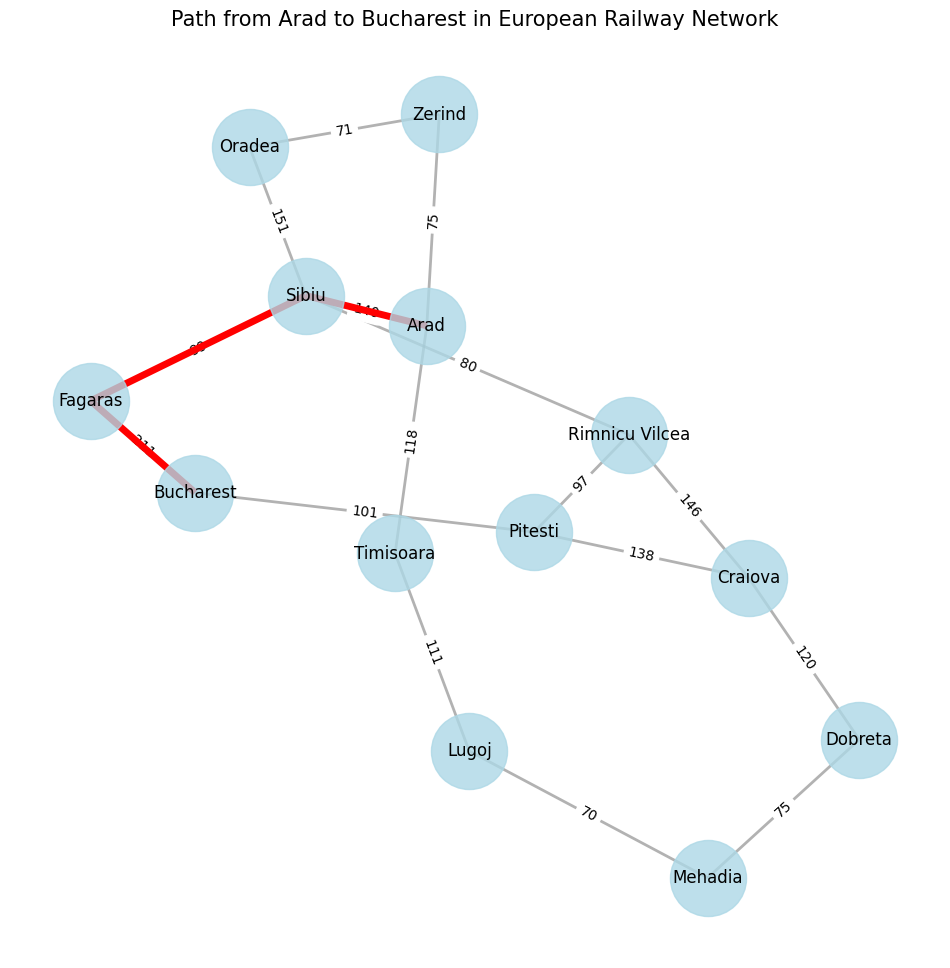

In [ ]:
# 找到從 Arad 到 Bucharest 的路徑
path = greedy_best_first_search('Arad', 'Bucharest')
print("Path from Arad to Bucharest:", path)

# 創建一個圖形物件
G = nx.Graph()

# 添加邊與權重
for city, neighbors in graph.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

# 定義圖的佈局
pos = nx.spring_layout(G, seed=42)

# 設置繪圖
plt.figure(figsize=(12, 12))

# 繪製節點和邊
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.6, edge_color='gray')

# 繪製節點標籤
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# 繪製邊的權重（距離）
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 高亮顯示從 Arad 到 Bucharest 的路徑
if path:
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=5, edge_color='red')

# 設置圖標題並顯示圖形
plt.title("Path from Arad to Bucharest in European Railway Network", fontsize=15)
plt.axis('off')
plt.show()

Path from Oradea to Bucharest: ['Oradea', 'Sibiu', 'Fagaras', 'Bucharest']


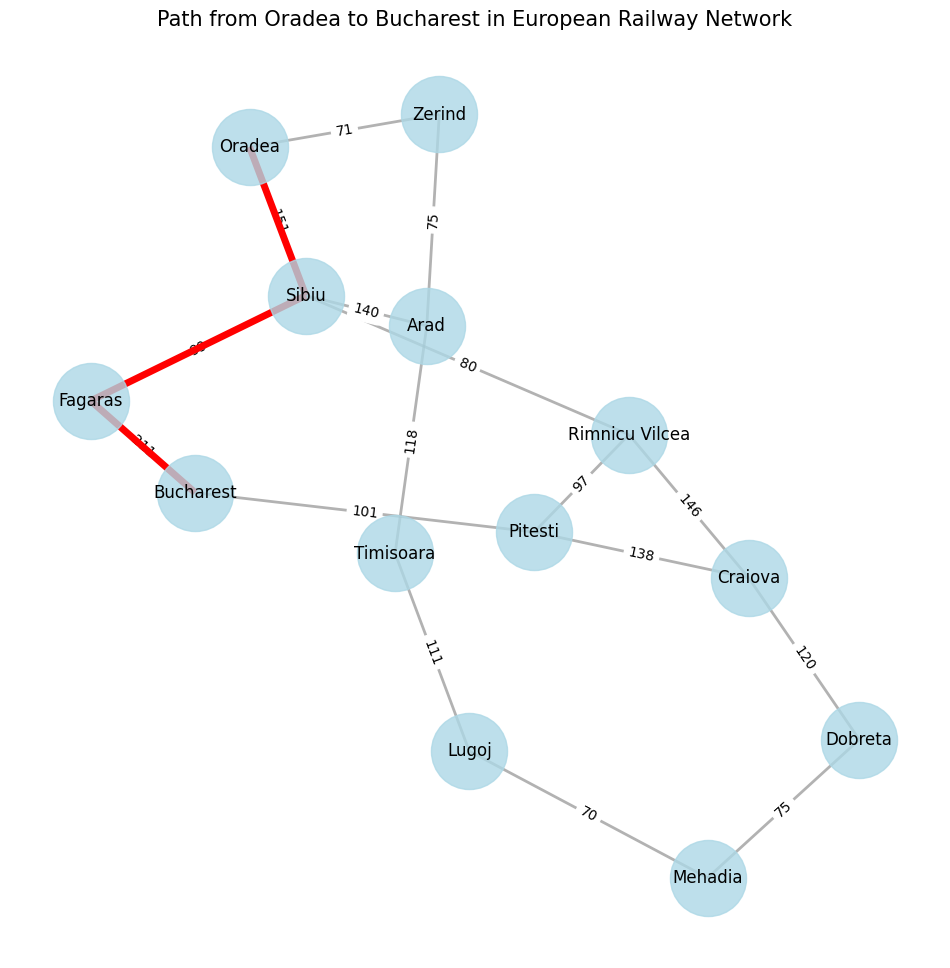

In [ ]:
# 找到從 Oradea 到 Bucharest 的路徑
path = greedy_best_first_search('Oradea', 'Bucharest')
print("Path from Oradea to Bucharest:", path)

# 創建一個圖形物件
G = nx.Graph()

# 添加邊與權重
for city, neighbors in graph.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

# 定義圖的佈局
pos = nx.spring_layout(G, seed=42)

# 設置繪圖
plt.figure(figsize=(12, 12))

# 繪製節點和邊
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.6, edge_color='gray')

# 繪製節點標籤
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# 繪製邊的權重（距離）
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 高亮顯示從 Oradea 到 Bucharest 的路徑
if path:
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=5, edge_color='red')

# 設置圖標題並顯示圖形
plt.title("Path from Oradea to Bucharest in European Railway Network", fontsize=15)
plt.axis('off')
plt.show()

Path from Mehadia to Bucharest: ['Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest']


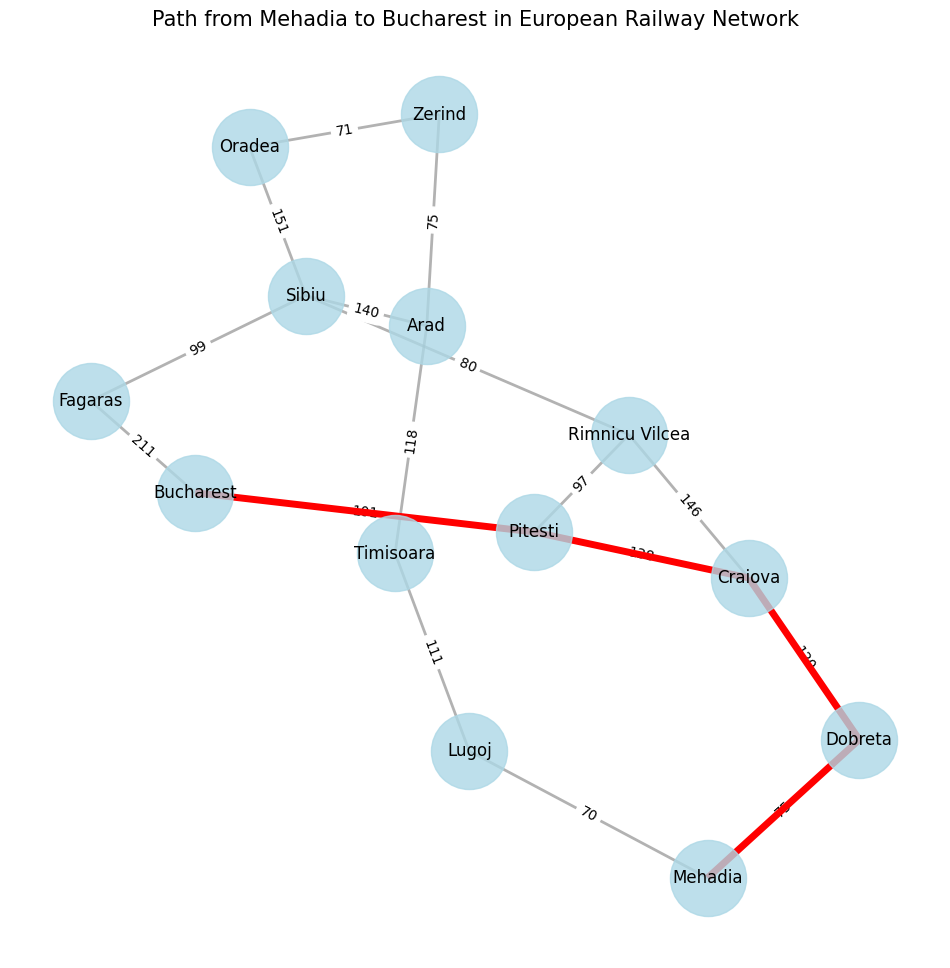

In [ ]:
# 找到從 Mehadia 到 Bucharest 的路徑
path = greedy_best_first_search('Mehadia', 'Bucharest')
print("Path from Mehadia to Bucharest:", path)

# 創建一個圖形物件
G = nx.Graph()

# 添加邊與權重
for city, neighbors in graph.items():
    for neighbor, distance in neighbors:
        G.add_edge(city, neighbor, weight=distance)

# 定義圖的佈局
pos = nx.spring_layout(G, seed=42)

# 設置繪圖
plt.figure(figsize=(12, 12))

# 繪製節點和邊
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, alpha=0.6, edge_color='gray')

# 繪製節點標籤
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# 繪製邊的權重（距離）
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# 高亮顯示從 Mehadia 到 Bucharest 的路徑
if path:
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=5, edge_color='red')

# 設置圖標題並顯示圖形
plt.title("Path from Mehadia to Bucharest in European Railway Network", fontsize=15)
plt.axis('off')
plt.show()